<img src="./img/DC_Gray _Logo.png">

<center><h2> Module 3 Project</h2></center>
<center><h2> Hypothesis Testing</h2></center>
<center><h3> Technical Notebook</h3></center>

**Authors:**

#### Xin Xue and Kaleb Nyqvist

**Business Problem:**

### We Study the effect of institutional trust to entrepreneurship on Kickstarter

#### Technical Note

In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [108]:
#load up all the packages
from data_precleaning import *
from data_cleaning import *
from comparison_attribute import *
from aggregation import *
from election_by_state import *
from hypothesis_tests import *
from visualizations import *
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
import numpy

In [3]:
#load raw json (avoid to run)
'''list_of_files=json_filter("json_data")
csv_list=[]
for i in list_of_files:
    jsons=json_generator(i)
    csv_list.append(generate_kickstarter_csv(jsons))'''

'list_of_files=json_filter("json_data")\ncsv_list=[]\nfor i in list_of_files:\n    jsons=json_generator(i)\n    csv_list.append(generate_kickstarter_csv(jsons))'

In [4]:
#clean data file and save it to a pickle that is easy to load (avoid to run)
'''kickstarter=kickstarter_concat(csv_list,"Trial_Pickle")
category=pd.read_csv("data/categories.csv")
kickstarter_cleaned=full_clean(kickstarter,category)'''

'kickstarter=kickstarter_concat(csv_list,"Trial_Pickle")\ncategory=pd.read_csv("data/categories.csv")\nkickstarter_cleaned=full_clean(kickstarter,category)'

In [13]:
#load all data
kickstarter_clean=pd.read_pickle("data/cleaned_df.pickle")
trustdata = pd.read_csv('data/self-reported-trust-attitudes.csv')
election_data=pd.read_csv('data/1976-2016-president.csv')

In [15]:
trust_funding_data=add_trustdata(trustdata, kickstarter_clean)

We use the year(s) [2014] in the trust data
There are 98 countries in the trust data
After merge, there are 78 countries in the country-trust-funding data


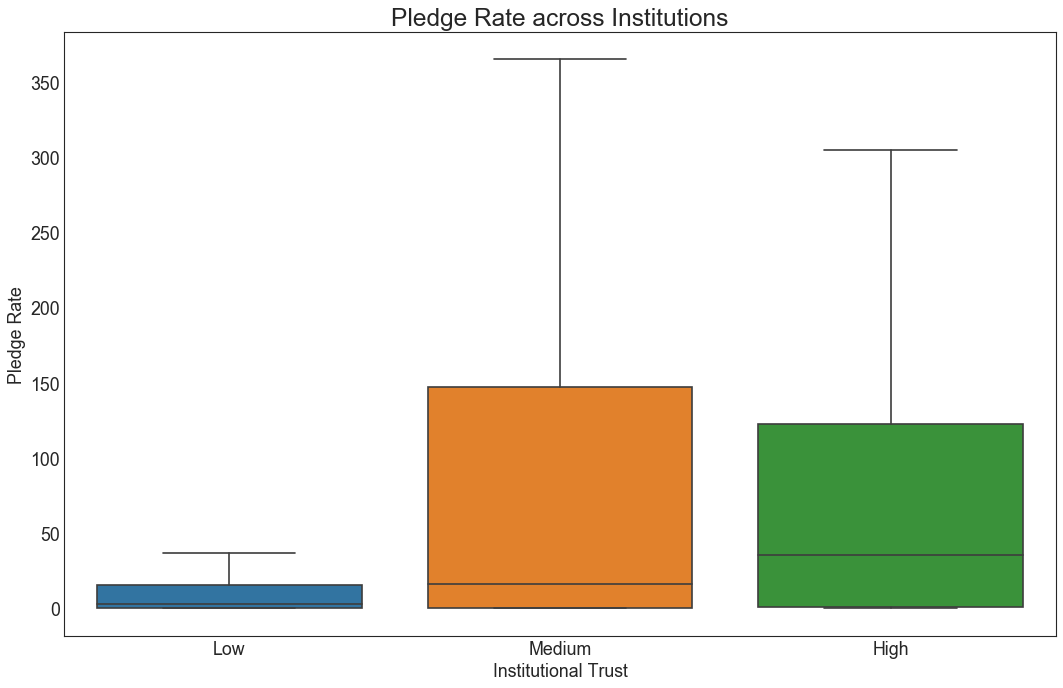

In [48]:
#plot 1: destribution of Funding Percentage for Low trust, Medium trust and High trust countries
trust_bin_plot= visualization_BOX('Trust_Bin', 'Pledge_Percentage', trust_funding_data, None,"Institutional Trust", "Pledge Rate", "Pledge Rate across Institutions", "Pledge_Rate_Trust_Bin")

In [113]:
#Hypothesis 1: Trust do not matter to pledge rate across countries
equation1='Pledge_Percentage ~ C(Trust_Bin,Treatment(reference="Low"))'
FTest(trust_funding_data, equation1, Null="Trust do not matter to Pledge Rate.", alpha=0.01)

We test the null hypothesis of H0: Trust do not matter to Pledge Rate.
Based on the p value of 6.138145621541366e-142 and our alpha of 0.01 we reject the null hypothesis.
---------------------
Here is the regression for you to reference
---------------------
                            OLS Regression Results                            
Dep. Variable:      Pledge_Percentage   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     325.4
Date:                Fri, 23 Aug 2019   Prob (F-statistic):          6.14e-142
Time:                        13:52:54   Log-Likelihood:            -2.8786e+06
No. Observations:              429871   AIC:                         5.757e+06
Df Residuals:                  429868   BIC:                         5.757e+06
Df Model:                           2                                         
Covariance Type:            no

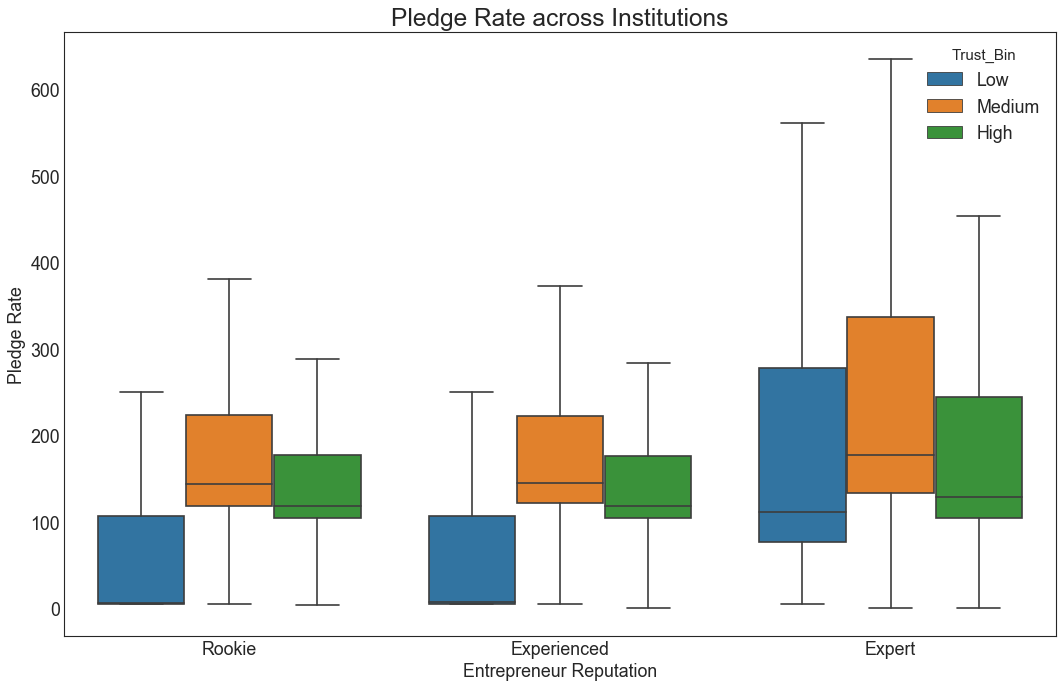

In [54]:
#plot 2: destribution of Funding Percentage for Low trust, Medium trust and High trust countries by Entrepreneur reputation
trust_bin_plot2= visualization_BOX('Entrepreneur_Experience', 'Pledge_Percentage', trust_funding_data, "Trust_Bin", "Entrepreneur Reputation", "Pledge Rate", "Pledge Rate across Institutions", "Pledge_Rate_Trust_Bin_by_Repuation")

In [109]:
#Hypothesis 2: Test if in low-trust countries, experience matters
Rookie_from_low_trust=trust_funding_data[(trust_funding_data['Entrepreneur_Experience']=="Rookie") \
                                         & (trust_funding_data['Trust_Bin']=="Low")]['Pledge_Percentage']
Experienced_from_low_trust=trust_funding_data[(trust_funding_data['Entrepreneur_Experience']=="Experienced") \
                                         & (trust_funding_data['Trust_Bin']=="Low")]['Pledge_Percentage']
Statement1="state that in low-trust countries, experience matters."
Test2=TTest(Rookie_from_low_trust, Experienced_from_low_trust, Null_Statement=['Mean of Rookies in Low Trust Countries', 'Mean of Experienced in Low Trust Countries', 'equal to', Statement1], two_sided=True, alpha=0.05)

We test the null hypothesis of H0: Mean of Rookies in Low Trust Countries is equal to Mean of Experienced in Low Trust Countries
Based on the p value of 0.4493386145072429 and our alpha of 0.05 we fail to reject the null hypothesis.

Due to these results, we cannot state that in low-trust countries, experience matters.
.


In [65]:
#aggregate the election data to blue state and red state
election_agged=DT_Effect(election_data)

In [66]:
kickstarter_us=kickstarter_clean[kickstarter_clean['Country'].isin(['US'])]
kickstarter_us=kickstarter_us.merge(election_agged, on=['State'])

In [122]:
kickstarter_ca=kickstarter_clean[kickstarter_clean['Country'].isin(['CA'])]
kickstarter_ca['Ideology_Bin']="Canada"
kickstarter_us_ca=pd.concat([kickstarter_ca,kickstarter_us], ignore_index=True, sort=False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


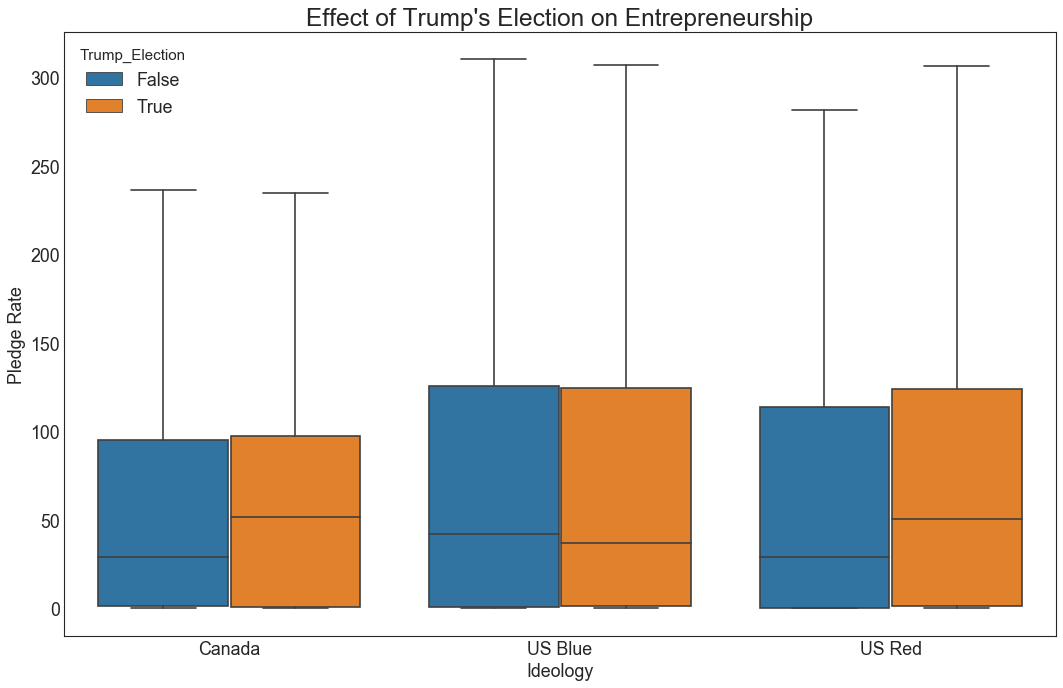

In [70]:
trump_plot= visualization_BOX('Ideology_Bin', 'Pledge_Percentage',\
        kickstarter_us_ca, "Trump_Election", "Ideology", "Pledge Rate",\
        "Effect of Trump's Election on Entrepreneurship", "Trump1")

In [24]:
#Define our population to sample from for visualization

In [71]:
Blue_Before_Trump=kickstarter_us[(kickstarter_us['Ideology_Bin']=="US Blue") & (kickstarter_us['Trump_Election']==0)]
Blue_After_Trump=kickstarter_us[(kickstarter_us['Ideology_Bin']=="US Blue") & (kickstarter_us['Trump_Election']==1)]
Red_Before_Trump=kickstarter_us[(kickstarter_us['Ideology_Bin']=="US Red") & (kickstarter_us['Trump_Election']==0)]
Red_After_Trump=kickstarter_us[(kickstarter_us['Ideology_Bin']=="US Red") & (kickstarter_us['Trump_Election']==1)]

In [89]:
Red_Before_Trump_Means=create_sample_dists(Red_Before_Trump, 'Pledge_Percentage', 5000, 100)
Red_After_Trump_Means=create_sample_dists(Red_After_Trump, 'Pledge_Percentage', 5000, 100)
Blue_Before_Trump_Means=create_sample_dists(Blue_Before_Trump, 'Pledge_Percentage', 7000, 100)
Blue_After_Trump_Means=create_sample_dists(Blue_After_Trump, 'Pledge_Percentage', 7000, 100)
CA_Before_Trump_Means=create_sample_dists(kickstarter_ca[(kickstarter_ca['Trump_Election']==0)], 'Pledge_Percentage', 3000, 100)
CA_After_Trump_Means=create_sample_dists(kickstarter_ca[(kickstarter_ca['Trump_Election']==1)], 'Pledge_Percentage', 2200, 100)

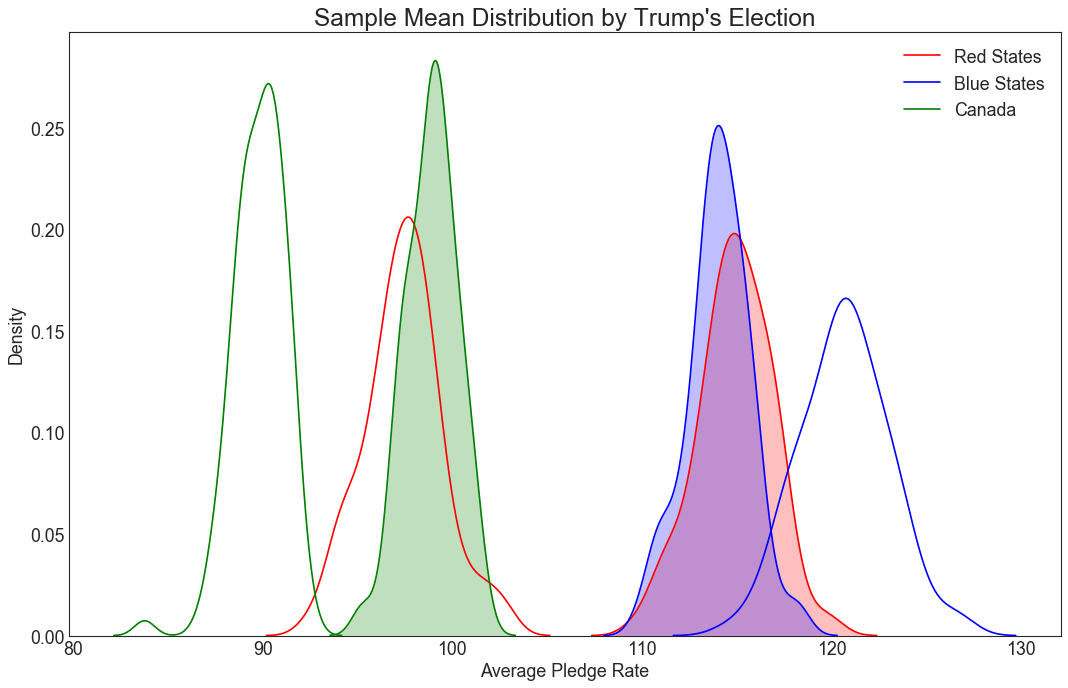

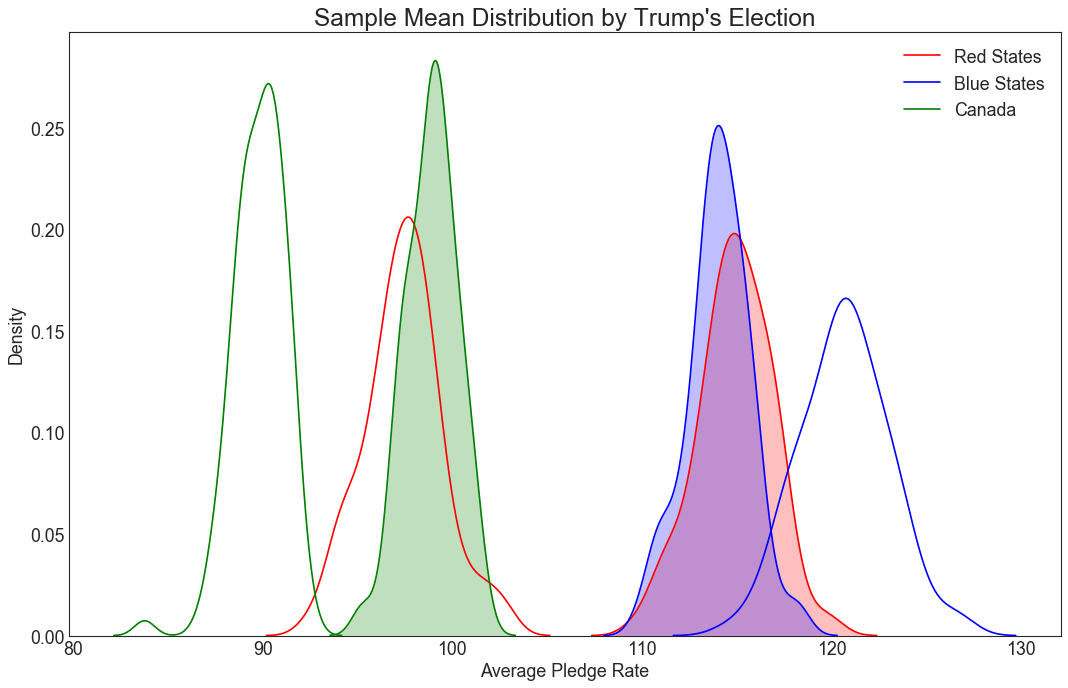

In [103]:
Datas=[Red_Before_Trump_Means,Red_After_Trump_Means, Blue_Before_Trump_Means, Blue_After_Trump_Means, CA_Before_Trump_Means, CA_After_Trump_Means]
shades=[False, True, False, True, False, True]
colors=['red','red','blue','blue','green','green']
labels= ['Red States', None,'Blue States', None,'Canada', None,]
visualization_KDN(Datas, labels, shades, colors, "Average Pledge Rate",\
                  "Density", "Sample Mean Distribution by Trump's Election", "Trump_Density")

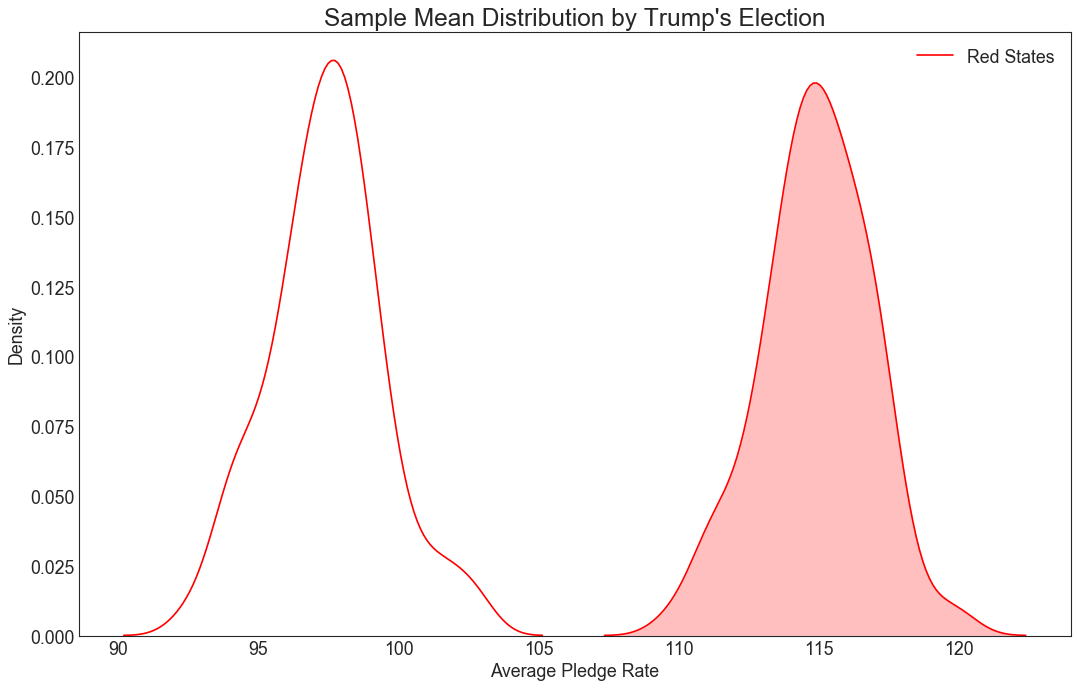

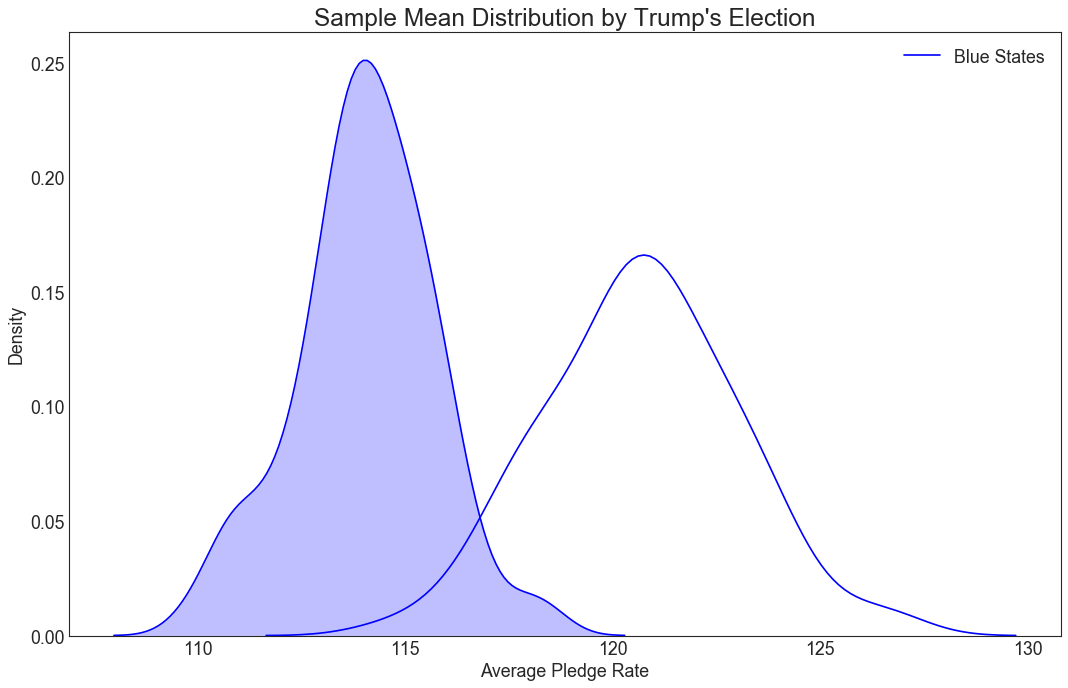

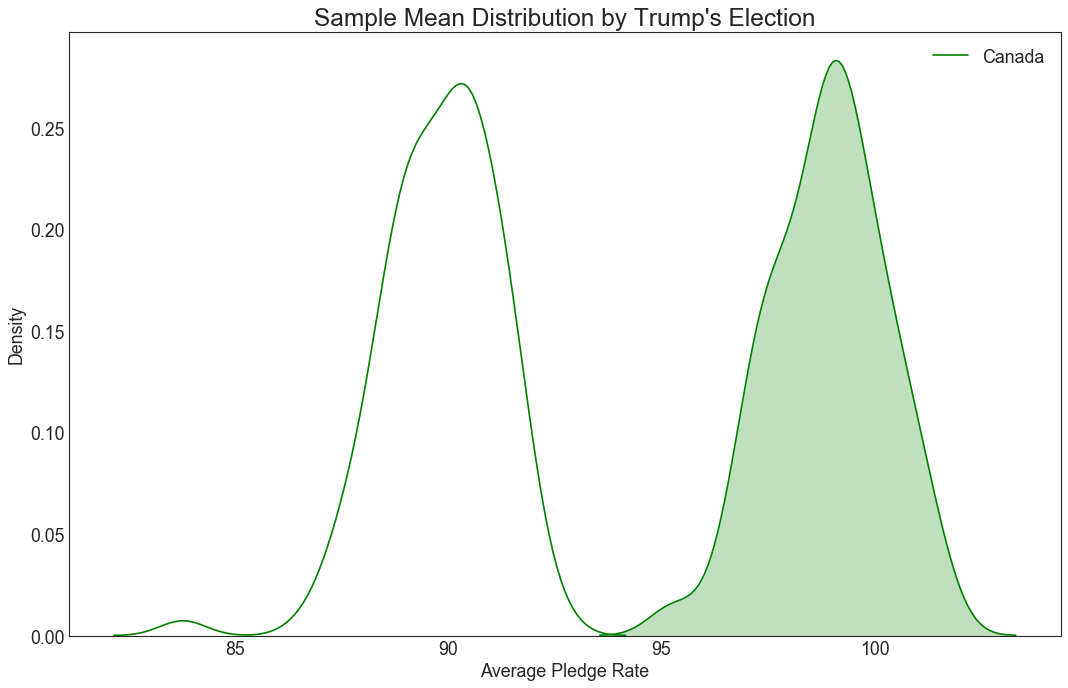

In [102]:
Datas=[Red_Before_Trump_Means,Red_After_Trump_Means, Blue_Before_Trump_Means, Blue_After_Trump_Means, CA_Before_Trump_Means, CA_After_Trump_Means]
shades=[False, True, False, True, False, True]
colors=['red','red','blue','blue','green','green']
labels= ['Red States', None,'Blue States', None,'Canada', None,]
for i in range(3):
    visualization_KDN(Datas[2*i:2*(i+1)], labels[2*i:2*(i+1)], shades[2*i:2*(i+1)], colors[2*i:2*(i+1)], "Average Pledge Rate",\
                      "Density", "Sample Mean Distribution by Trump's Election", "Trump_{}".format(i))

In [117]:
#Hypothesis 3: Trump's election affect blue states differently from red states
reg = smf.ols(formula='Pledge_Percentage ~ C(Ideology_Bin, Treatment(reference="Canada"))+ C(Ideology_Bin, Treatment(reference="Canada")) * \
        C(Trump_Election, Treatment(reference=0))+C(Trump_Election, Treatment(reference=0))', data=kickstarter_us_ca).fit()
print(reg.summary())
print('''Look at the stats for C(Ideology_Bin, Treatment(reference="Canada"))[T.US Blue]:C(Trump_Election, Treatment(reference=0))[T.True]''')

                            OLS Regression Results                            
Dep. Variable:      Pledge_Percentage   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     46.42
Date:                Fri, 23 Aug 2019   Prob (F-statistic):           4.43e-48
Time:                        14:44:51   Log-Likelihood:            -5.9659e+05
No. Observations:               89142   AIC:                         1.193e+06
Df Residuals:                   89136   BIC:                         1.193e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [115]:
#Hypothesis 4: Trump's election affect all category the same
equation2='Pledge_Percentage ~ C(Sup_Category, Treatment(reference="Technology")) * C(Trump_Election, Treatment(reference=0))'
FTest(kickstarter_us, equation2, Null="Trump's election affect all category the same.", alpha=0.001)

We test the null hypothesis of H0: Trump's election affect all category the same.
Based on the p value of 0.0 and our alpha of 0.001 we reject the null hypothesis.
---------------------
Here is the regression for you to reference
---------------------
                            OLS Regression Results                            
Dep. Variable:      Pledge_Percentage   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     312.5
Date:                Fri, 23 Aug 2019   Prob (F-statistic):               0.00
Time:                        14:38:21   Log-Likelihood:            -5.5297e+05
No. Observations:               83080   AIC:                         1.106e+06
Df Residuals:                   83054   BIC:                         1.106e+06
Df Model:                          25                                         
Covariance Type:            nonrobust

#### end